In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [13]:
df = pd.read_csv('archive-2/AAPL.csv')

In [14]:
df

,Date,Open_,High,Low,Close_,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,17/10/05,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,18/10/05,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,19/10/05,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,20/10/05,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,21/10/05,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,07/08/20,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
3728,10/08/20,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
3729,11/08/20,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
3730,12/08/20,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3732 non-null   object 
 1   Open_             3732 non-null   float64
 2   High              3732 non-null   float64
 3   Low               3732 non-null   float64
 4   Close_            3732 non-null   float64
 5   Volume            3732 non-null   int64  
 6   SD20              3732 non-null   float64
 7   Upper_Band        3732 non-null   float64
 8   Lower_Band        3732 non-null   float64
 9   S_Close(t-1)      3732 non-null   float64
 10  S_Close(t-2)      3732 non-null   float64
 11  S_Close(t-3)      3732 non-null   float64
 12  S_Close(t-5)      3732 non-null   float64
 13  S_Open(t-1)       3732 non-null   float64
 14  MA5               3732 non-null   float64
 15  MA10              3732 non-null   float64
 16  MA20              3732 non-null   float64


In [17]:
x = df.iloc[:,1:4]

In [18]:
x

,Open_,High,Low
0,6.66,6.69,6.50
1,6.57,6.66,6.44
2,6.43,6.78,6.32
3,6.72,6.97,6.71
4,7.02,7.03,6.83
...,...,...,...
3727,452.82,454.70,441.17
3728,450.40,455.10,440.00
3729,447.88,449.93,436.43
3730,441.99,453.10,441.19


In [21]:
y = df.iloc[:,4:5]

In [22]:
y

,Close_
0,6.60
1,6.45
2,6.78
3,6.93
4,6.87
...,...
3727,444.45
3728,450.91
3729,437.50
3730,452.04


In [25]:
#Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [26]:
x_train.shape

(2612, 3)

In [27]:
y_train.shape

(2612, 1)

In [28]:
x_test.shape

(1120, 3)

In [29]:
y_test.shape

(1120, 1)

In [34]:
#Training
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
lr.coef_

array([[-0.59135437,  0.75743968,  0.83477948]])

In [36]:
lr.intercept_

array([0.0218706])

In [37]:
#Predictions
predictions = lr.predict(x_test)

In [38]:
#Cost
cost = mean_squared_error(y_test, predictions)
cost

0.6977495878621897

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


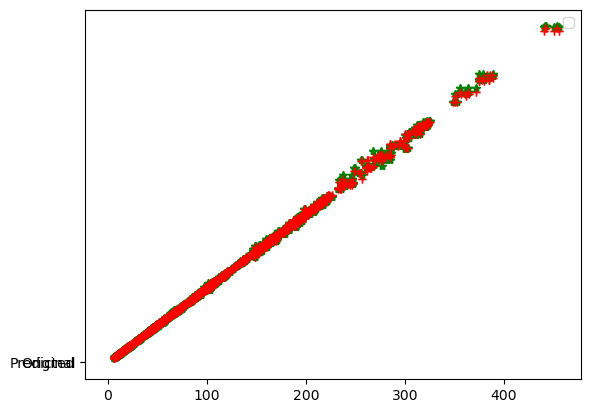

In [42]:
fig, ax = plt.subplots()
ax.plot(x_test, y_test, "*", 'Original', color = 'green')
ax.plot(x_test, predictions, "+", 'Predicted', color = 'red')

legend = ax.legend()

plt.plot(x_test, y_test, "*", color = 'green')
plt.plot(x_test, predictions, "+", color = 'red')
plt.show()

In [43]:
#Assumptions
residuals = predictions - y_test

In [45]:
residuals

,Close_
2860,0.179404
488,-0.040103
1388,-0.062909
387,0.074007
2810,0.759351
...,...
1642,0.013865
2778,0.875280
1516,-0.237362
337,-0.035681


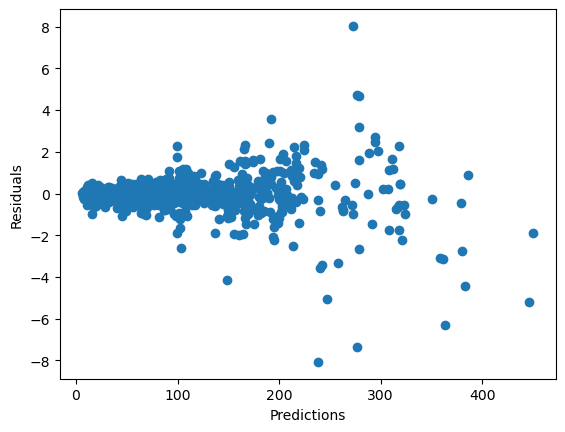

In [46]:
plt.scatter(predictions, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

/var/folders/91/lvlrfqfd32b83_21yxnszsn00000gn/T/ipykernel_1142/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

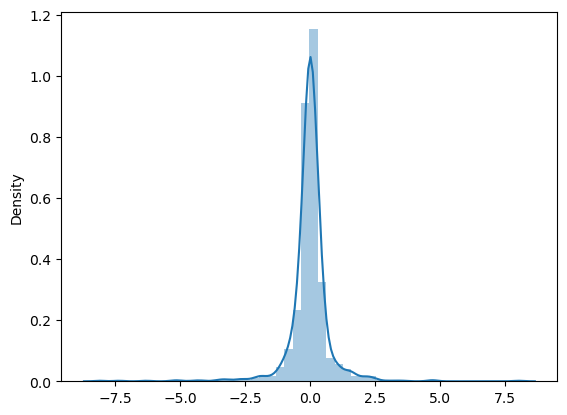

In [47]:
sns.distplot(residuals)

In [50]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Open_,High,Low
2576,1.0,93.32,93.45,91.73
134,1.0,8.74,8.83,8.54
503,1.0,21.32,21.36,20.89
2402,1.0,117.40,117.68,115.23
1397,1.0,43.01,43.32,42.72
...,...,...,...,...
2106,1.0,67.23,68.16,67.15
2325,1.0,101.68,102.93,99.38
2303,1.0,104.40,104.80,101.78
3392,1.0,195.23,197.26,194.74


In [51]:
model = sm.OLS(y_train, x_with_constant)

In [52]:
result = model.fit()

In [53]:
result.params

const    0.021871
Open_   -0.591354
High     0.757440
Low      0.834779
dtype: float64

In [54]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Close_   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.907e+06
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:17:01   Log-Likelihood:                -3257.2
No. Observations:                2612   AIC:                             6522.
Df Residuals:                    2608   BIC:                             6546.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219      0.025      0.893      0.3